In [32]:
from keras.applications.vgg16 import VGG16, decode_predictions
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp

# 1. Convolutional Neural Network Basic

In [2]:
r1 = np.zeros(16)
r2 = np.hstack([np.zeros(2), np.ones(12), np.zeros(2)])
r3 = np.insert(np.insert(np.zeros(14),2 ,1), -2, 1)
x = np.vstack([r1, r1, r2, np.tile(r3,(10,1)), r2, r1, r1])

In [3]:
k1 = np.zeros((2,2))
k1[:,0] = 1; k1[:,1] = -1
k1

array([[ 1., -1.],
       [ 1., -1.]])

In [4]:
k2 = np.zeros((2,2))
k2[0, :] = 1; k2[1, :] = -1
k2

array([[ 1.,  1.],
       [-1., -1.]])

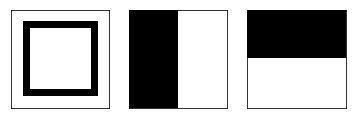

In [5]:
plt.subplot(131)
plt.imshow(x, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.subplot(132)
plt.imshow(k1, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.subplot(133)
plt.imshow(k2, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.show()

In [6]:
from scipy.ndimage.filters import convolve

phi1 = convolve(x, k1)
phi2 = convolve(x, k2)

In [7]:
phi1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1.,  0.,  0.],
       [ 0.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.],
       [ 0.,  2., -2.,  0.,  0

In [8]:
phi2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         1.,  0.,  0.],
       [ 0.,  0., -1., -2., -2., -2., -2., -2., -2., -2., -2., -2., -1.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

In [9]:
from skimage.measure import block_reduce

phi1r = block_reduce(phi1, (2,2), np.max)
phi2r = block_reduce(phi2, (2,2), np.max)

In [10]:
phi1r

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
phi2r

array([[1., 2., 2., 2., 2., 2., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

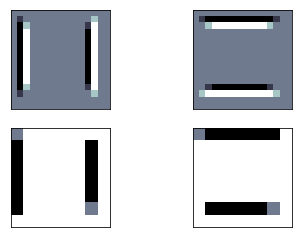

In [12]:
plt.subplot(221)
plt.imshow(phi1, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(222)
plt.imshow(phi2, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(phi1r, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(phi2r, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.show()

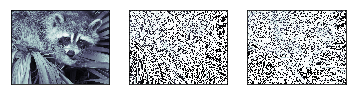

In [13]:
x = sp.misc.face(gray=True)
phi1 = convolve(x, k1)
phi2 = convolve(x, k2)
phi1r = block_reduce(phi1, (2,2), np.max)
phi2r = block_reduce(phi2, (2,2), np.max)

plt.subplot(131)
plt.imshow(x, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(132)
plt.imshow(phi1r, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(133)
plt.imshow(phi2r, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.show()

# 2. Practice of CNN Basic using Olivetti Faces

In [14]:
from sklearn.datasets import fetch_olivetti_faces
from keras.utils import np_utils

In [15]:
face = fetch_olivetti_faces()

In [16]:
print(face.data.shape)
X_train = face.data
X_train = X_train.reshape(400, 64, 64)
print(X_train.shape)

(400, 4096)
(400, 64, 64)


In [17]:
print(face.target.shape)
Y_train = face.target

(400,)


In [18]:
X_train = X_train[:, :, :, np.newaxis]
Y_train = np_utils.to_categorical(Y_train, 40)

In [19]:
print(X_train.shape, Y_train.shape)

(400, 64, 64, 1) (400, 40)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.4, random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [23]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=(64, 64, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))


In [24]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [25]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [26]:
%%time
hist2 = model2.fit(X_train, y_train, epochs=25, batch_size=40, validation_data=(X_test, y_test), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/25
 - 1s - loss: 3.7008 - acc: 0.0083 - val_loss: 3.6901 - val_acc: 0.0188
Epoch 2/25
 - 1s - loss: 3.6858 - acc: 0.0167 - val_loss: 3.6982 - val_acc: 0.0250
Epoch 3/25
 - 1s - loss: 3.6765 - acc: 0.0417 - val_loss: 3.7206 - val_acc: 0.0313
Epoch 4/25
 - 1s - loss: 3.6665 - acc: 0.0333 - val_loss: 3.7134 - val_acc: 0.0250
Epoch 5/25
 - 1s - loss: 3.6537 - acc: 0.0333 - val_loss: 3.7160 - val_acc: 0.0188
Epoch 6/25
 - 1s - loss: 3.6420 - acc: 0.0958 - val_loss: 3.7635 - val_acc: 0.0625
Epoch 7/25
 - 1s - loss: 3.6153 - acc: 0.0875 - val_loss: 3.7704 - val_acc: 0.0125
Epoch 8/25
 - 1s - loss: 3.5627 - acc: 0.0708 - val_loss: 3.6625 - val_acc: 0.0438
Epoch 9/25
 - 1s - loss: 3.5325 - acc: 0.1375 - val_loss: 3.6594 - val_acc: 0.1750
Epoch 10/25
 - 1s - loss: 3.3254 - acc: 0.1750 - val_loss: 3.5685 - val_acc: 0.0375
Epoch 11/25
 - 1s - loss: 3.1178 - acc: 0.2042 - val_loss: 3.0013 - val_acc: 0.2063
Epoch 12/25
 - 1s - loss: 2.7927 - acc:

# 3. VGG16

In [27]:
%%time
model = VGG16()

CPU times: user 3.54 s, sys: 1.09 s, total: 4.63 s
Wall time: 2.8 s


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

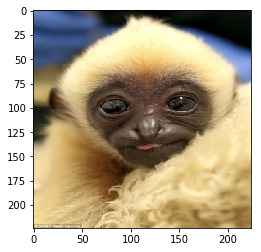

In [29]:
from PIL import Image
 
im = np.array(Image.open('3b237ef10767fd3789bb134679ab3920.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [30]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
np.argmax(yhat)

368

In [31]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

gibbon (45.37%)
